
# Árboles de Decisión
### Padecimientos cardíacos


<img src="https://c.mql5.com/2/47/decision_tree_sampe_imagee.png" align="left">

# Gráfica dispersión: Edad y Colesterol

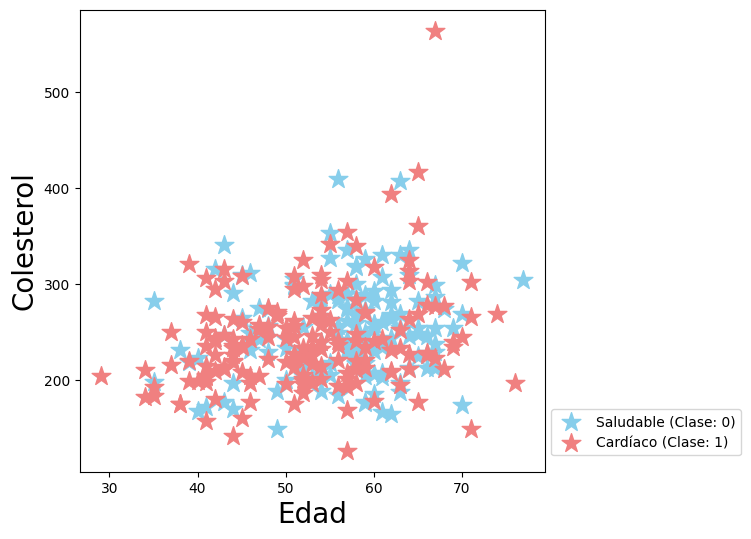

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pacientes = pd.read_csv("data/pacientes.csv")

pacientes.head()

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))

plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)


plt.scatter(saludables["edad"], saludables["colesterol"],label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)


plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()


# Entropía:
#### Promedio de información almacenada en una variable aleatoria

In [9]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50, 10])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


40    0.2
30    0.2
20    0.2
50    0.2
10    0.2
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.3219280948873626
1.0


# Datos de Entrenamiento y Prueba

In [10]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)


# Creación del Árbol de Decisión

0.5777777777777777
|--- Edad <= 54.50
|   |--- Colesterol <= 273.50
|   |   |--- Colesterol <= 173.50
|   |   |   |--- Colesterol <= 163.50
|   |   |   |   |--- Edad <= 47.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Edad >  47.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Colesterol >  163.50
|   |   |   |   |--- class: 0
|   |   |--- Colesterol >  173.50
|   |   |   |--- Colesterol <= 196.50
|   |   |   |   |--- class: 1
|   |   |   |--- Colesterol >  196.50
|   |   |   |   |--- Edad <= 49.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Edad >  49.50
|   |   |   |   |   |--- class: 1
|   |--- Colesterol >  273.50
|   |   |--- Colesterol <= 301.00
|   |   |   |--- Edad <= 49.50
|   |   |   |   |--- Colesterol <= 274.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Colesterol >  274.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Edad >  49.50
|   |   |   |   |--- class: 0
|   |   |--- Colesterol >  301.00
|   |   |   |--- Colesterol <= 333

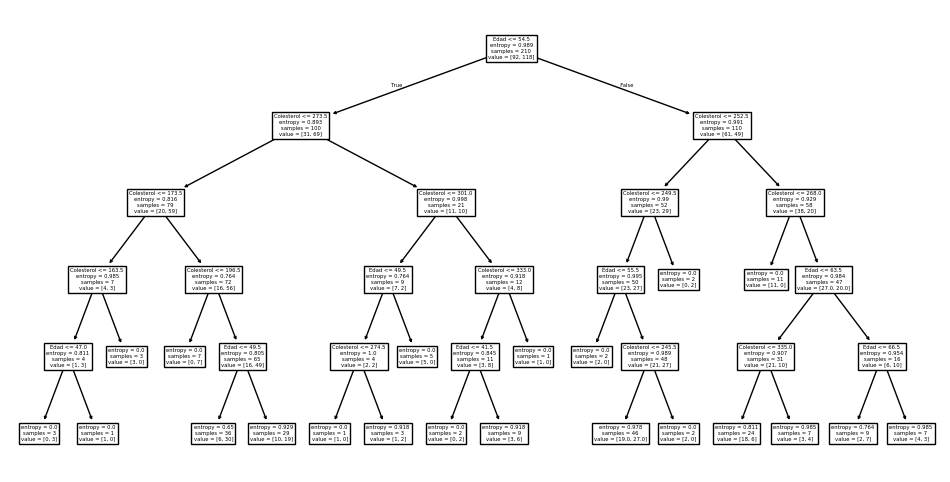

In [15]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,feature_names=["Edad", "Colesterol"]))

plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, feature_names=["Edad", "Colesterol"])
plt.show()


# Clasifica a nuevos pacientes

In [13]:
print("Nuevo paciente", arbol_decision.predict([[43, 410]]))

Nuevo paciente [1]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>